In [25]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/logistic_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 378 (delta 74), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (378/378), 42.71 MiB | 16.23 MiB/s, done.
Resolving deltas: 100% (197/197), done.
/content/machine_learning_1/logistic_regression/machine_learning_1/logistic_regression


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import utils
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
Data = pd.read_csv('/content/drive/MyDrive/Datasets/Social_Network_Ads (2).csv')
Data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


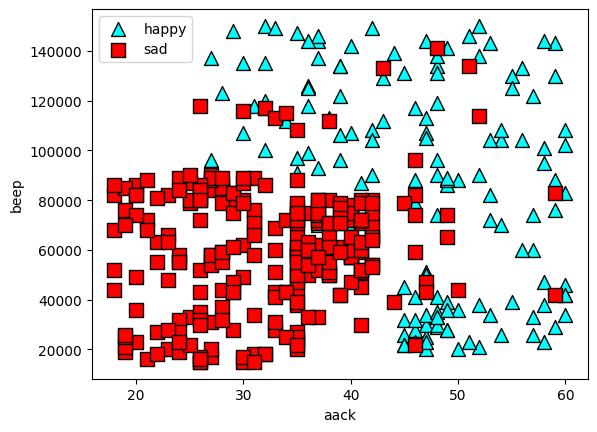

In [55]:
feature = Data[['Age' , 'EstimatedSalary']]
label = Data['Purchased']
utils.plot_points(feature.values,label.values)

In [29]:
# Hardcoded Logistic regression

def sigmoid(x):
  return 1/(1+np.exp(-x))

def score(weigth , bias , feature):
  return np.dot(weigth , feature) + bias

def prediction(weigth, bias, feature):
  output = sigmoid(score(weigth , bias , feature))
  return output

def log_loss(weights, bias, features, label):
    pred = 1.0 * prediction(weights, bias, features)

    output = -label * np.log(pred) - (1 - label) * np.log(1 - pred)
    return output

def total_log_loss(weights, bias, X, y):
    total_error = 0
    for i in range(len(X)):
        total_error += log_loss(weights, bias, X[i], y[i])
    return total_error

In [30]:
def logistic_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label - pred) * features[i] * learning_rate
        bias += (label - pred) * learning_rate

    return weights, bias

In [52]:
def logistic_regression_algorithm(features, labels, learning_rate=0.01, epochs=1000):




    weights = [1.0 for i in range(len(features[0]))]


    bias = 0.0


    errors = []


    for i in range(epochs):




        errors.append(total_log_loss(weights, bias, features, labels))


        j = random.randint(0, len(features) - 1)


        weights, bias = logistic_trick(weights, bias, features[j], labels[j], learning_rate)



    return weights, bias


In [53]:
logistic_regression_algorithm(feature.values , label.values)

/tmp/ipython-input-29-2682134345.py:16: RuntimeWarning: divide by zero encountered in log
  output = -label * np.log(pred) - (1 - label) * np.log(1 - pred)
/tmp/ipython-input-29-2682134345.py:16: RuntimeWarning: invalid value encountered in scalar multiply
  output = -label * np.log(pred) - (1 - label) * np.log(1 - pred)
/tmp/ipython-input-29-2682134345.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
/tmp/ipython-input-29-2682134345.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
/tmp/ipython-input-29-2682134345.py:16: RuntimeWarning: divide by zero encountered in log
  output = -label * np.log(pred) - (1 - label) * np.log(1 - pred)
/tmp/ipython-input-29-2682134345.py:16: RuntimeWarning: invalid value encountered in scalar multiply
  output = -label * np.log(pred) - (1 - label) * np.log(1 - pred)
/tmp/ipython-input-29-2682134345.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
/tmp/ipython-input-29-26821

([np.float64(4.060000000000001), np.float64(-279.0)],
 np.float64(-1.440000000000001))

In [57]:
# using sklearn
x_train , x_test , y_train , y_test=train_test_split(feature, label, test_size=0.2, random_state=42)

In [58]:
scaler = StandardScaler()
x_train_scalerd = scaler.fit_transform(x_train) # Data is huged Larged number so we must Scaled it
x_test_scalered = scaler.transform(x_test)

In [59]:
model = LogisticRegression()
model.fit(x_train_scalerd , y_train)

LogisticRegression()

In [63]:
y_prediction = model.predict(x_test_scalered)

In [64]:
# Step 7: Accuracy
print("Accuracy:", accuracy_score(y_test, y_prediction))

Accuracy: 0.8625


In [72]:
model.predict(scaler.transform([[49,36000]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [75]:
weigth1 = model.coef_[0]
Bias = model.intercept_[0]
print("weigth1: ", weigth1)
print("Bias: ", Bias)

weigth1:  [1.96509784 1.13509021]
Bias:  -0.9950491589967495
